In [2]:
import cv2
import matplotlib.pyplot as plt 
import numpy 
from glob import glob
from numpy import savez_compressed,load
import pickle as pk
from sklearn import metrics
import pandas as pd

In [2]:
female_path = glob('C:/Users/preetamvarun/Documents/projects/gender_classification/Module-2/Module-2/data/female/*.jpg')

In [3]:
male_path = glob('C:/Users/preetamvarun/Documents/projects/gender_classification/Module-2/Module-2/data/male/*.jpg')

In [4]:
print("the length of female_path is {}".format(len(female_path)))
print("the length of male_path is {}".format(len(male_path)))

the length of female_path is 7000
the length of male_path is 7000


In [6]:
sfi = glob('C:/Users/preetamvarun/Documents/projects/gender_classification/Module-2/Module-2/data/female/female_000010.jpg')

In [7]:
print(sfi)

['C:/Users/preetamvarun/Documents/project/Module-2/Module-2/data/female/female_000010.jpg']


In [24]:
image = cv2.imread(sfi[0])

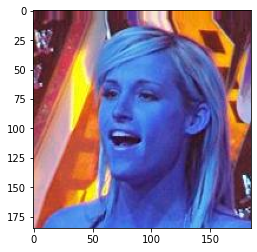

In [41]:
plt.imshow(image)

In [26]:
# now convert this image to gray scale image
gs_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

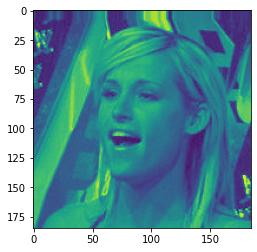

In [27]:
plt.imshow(gs_img)

In [3]:
# now crop this gray scale image
# load the haar cascade classifier model
haar = cv2.CascadeClassifier('C:/Users/preetamvarun/Documents/projects/gender_classification/Module-2/Module-2/data/haarcascade_frontalface_default.xml')
print(haar)

<CascadeClassifier 000001E67E2C5B10>


In [29]:
face = haar.detectMultiScale(gs_img,1.3,5)

In [89]:
print(face)

[[ 23  26 110 110]]


In [32]:
innerlist = face[0]
print(innerlist)

[ 23  26 110 110]


In [33]:
x,y,w,h = innerlist[0],innerlist[1],innerlist[2],innerlist[3]

In [36]:
crop_image = image[y:y+h,x:x+w]

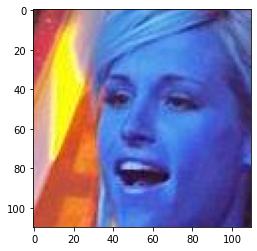

In [39]:
plt.imshow(crop_image)

In [42]:
cv2.imwrite('C:/Users/preetamvarun/Documents/projects/gender_classification/Module-2/Module-2/data/example.jpg',crop_image)

True

In [147]:
# C:\Users\preetamvarun\Documents\project\Module-2\Module-2\data\female_crop
# C:\Users\preetamvarun\Documents\project\Module-2\Module-2\data\male_crop
def crop_images(path,number):
    img = cv2.imread(path) 
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gender = path.split("\\")[-1].split(".")[0].split("_")[0]
    faces = haar.detectMultiScale(gray,1.5,5)
    for x,y,w,h in faces:
        roi = img[y:y+h,x:x+w]
    if gender == "male":
        cv2.imwrite('C:/Users/preetamvarun/Documents/projects/gender_classification/Module-2/Module-2/data/male_crop/{}_{}.png'.format(gender,number),roi)
    else:
        cv2.imwrite('C:/Users/preetamvarun/Documents/projects/gender_classification/Module-2/Module-2/data/female_crop/{}_{}.png'.format(gender,number),roi)


In [150]:
hit,miss = 0,0
for i in range(len(total_path)):
    try:
        crop_images(total_path[i],i)
        hit += 1
    except:
        miss += 1
print("processed {} number of images successfully".format(hit))
print("failed to process in {} number of images".format(miss))

processed 6058 number of images successfully
failed to process in 7942 number of images


In [5]:
from glob import glob
import cv2

In [7]:
male_cropped_path = glob('C:/Users/preetamvarun/Documents/projects/gender_classification/Module-2/Module-2/data/male_crop/*.png')
female_cropped_path = glob('C:/Users/preetamvarun/Documents/projects/gender_classification/Module-2/Module-2/data/female_crop/*.png')

In [8]:
from PIL import Image

In [9]:
def get_image_size(path):
    img = Image.open(path)
    return img.size[0]

In [10]:
path = female_cropped_path + male_cropped_path

In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame(data = path,columns = ['path'])

In [13]:
df.head()

,path
0,C:/Users/preetamvarun/Documents/project/Module...
1,C:/Users/preetamvarun/Documents/project/Module...
2,C:/Users/preetamvarun/Documents/project/Module...
3,C:/Users/preetamvarun/Documents/project/Module...
4,C:/Users/preetamvarun/Documents/project/Module...


In [14]:
df['size'] = df['path'].apply(get_image_size)

In [15]:
df

,path,size
0,C:/Users/preetamvarun/Documents/project/Module...,273
1,C:/Users/preetamvarun/Documents/project/Module...,182
2,C:/Users/preetamvarun/Documents/project/Module...,182
3,C:/Users/preetamvarun/Documents/project/Module...,182
4,C:/Users/preetamvarun/Documents/project/Module...,81
...,...,...
6053,C:/Users/preetamvarun/Documents/project/Module...,182
6054,C:/Users/preetamvarun/Documents/project/Module...,54
6055,C:/Users/preetamvarun/Documents/project/Module...,182
6056,C:/Users/preetamvarun/Documents/project/Module...,182


In [16]:
df.describe()

,size
count,6058.000000
mean,154.030703
std,71.244153
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


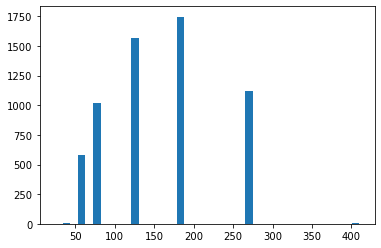

In [17]:
plt.hist(df['size'],bins = 40)
plt.show()

In [18]:
df_new = df[df['size'] > 60]

In [19]:
df_new

,path,size
0,C:/Users/preetamvarun/Documents/project/Module...,273
1,C:/Users/preetamvarun/Documents/project/Module...,182
2,C:/Users/preetamvarun/Documents/project/Module...,182
3,C:/Users/preetamvarun/Documents/project/Module...,182
4,C:/Users/preetamvarun/Documents/project/Module...,81
...,...,...
6052,C:/Users/preetamvarun/Documents/project/Module...,122
6053,C:/Users/preetamvarun/Documents/project/Module...,182
6055,C:/Users/preetamvarun/Documents/project/Module...,182
6056,C:/Users/preetamvarun/Documents/project/Module...,182


In [20]:
df_new

,path,size
0,C:/Users/preetamvarun/Documents/project/Module...,273
1,C:/Users/preetamvarun/Documents/project/Module...,182
2,C:/Users/preetamvarun/Documents/project/Module...,182
3,C:/Users/preetamvarun/Documents/project/Module...,182
4,C:/Users/preetamvarun/Documents/project/Module...,81
...,...,...
6052,C:/Users/preetamvarun/Documents/project/Module...,122
6053,C:/Users/preetamvarun/Documents/project/Module...,182
6055,C:/Users/preetamvarun/Documents/project/Module...,182
6056,C:/Users/preetamvarun/Documents/project/Module...,182


In [21]:
print(df_new['path'])

0       C:/Users/preetamvarun/Documents/project/Module...
1       C:/Users/preetamvarun/Documents/project/Module...
2       C:/Users/preetamvarun/Documents/project/Module...
3       C:/Users/preetamvarun/Documents/project/Module...
4       C:/Users/preetamvarun/Documents/project/Module...
                              ...                        
6052    C:/Users/preetamvarun/Documents/project/Module...
6053    C:/Users/preetamvarun/Documents/project/Module...
6055    C:/Users/preetamvarun/Documents/project/Module...
6056    C:/Users/preetamvarun/Documents/project/Module...
6057    C:/Users/preetamvarun/Documents/project/Module...
Name: path, Length: 5466, dtype: object


In [22]:
string = df_new['path'][0]

In [23]:
string

'C:/Users/preetamvarun/Documents/project/Module-2/Module-2/data/female_crop\\female_0.png'

In [24]:
def gender(path):
    try:
        path = path.split("crop")[0].split("/")[-1].split("_")[0]
    except:
        path = None
    return path

In [25]:
df['gender'] = df['path'].apply(gender)

In [26]:
df['gender'].value_counts(normalize = True)

female    0.592605
male      0.407395
Name: gender, dtype: float64

In [33]:
df.head(10)

,path,size,gender
0,C:/Users/preetamvarun/Documents/project/Module...,273,female
1,C:/Users/preetamvarun/Documents/project/Module...,182,female
2,C:/Users/preetamvarun/Documents/project/Module...,182,female
3,C:/Users/preetamvarun/Documents/project/Module...,182,female
4,C:/Users/preetamvarun/Documents/project/Module...,81,female
5,C:/Users/preetamvarun/Documents/project/Module...,182,female
6,C:/Users/preetamvarun/Documents/project/Module...,273,female
7,C:/Users/preetamvarun/Documents/project/Module...,122,female
8,C:/Users/preetamvarun/Documents/project/Module...,182,female
9,C:/Users/preetamvarun/Documents/project/Module...,182,female


In [28]:
df_new.head()

,path,size
0,C:/Users/preetamvarun/Documents/project/Module...,273
1,C:/Users/preetamvarun/Documents/project/Module...,182
2,C:/Users/preetamvarun/Documents/project/Module...,182
3,C:/Users/preetamvarun/Documents/project/Module...,182
4,C:/Users/preetamvarun/Documents/project/Module...,81


In [29]:
df_new['size'].min()

81

In [34]:
df_new

,path,size,gender
0,C:/Users/preetamvarun/Documents/project/Module...,273,female
1,C:/Users/preetamvarun/Documents/project/Module...,182,female
2,C:/Users/preetamvarun/Documents/project/Module...,182,female
3,C:/Users/preetamvarun/Documents/project/Module...,182,female
4,C:/Users/preetamvarun/Documents/project/Module...,81,female
...,...,...,...
6052,C:/Users/preetamvarun/Documents/project/Module...,122,male
6053,C:/Users/preetamvarun/Documents/project/Module...,182,male
6055,C:/Users/preetamvarun/Documents/project/Module...,182,male
6056,C:/Users/preetamvarun/Documents/project/Module...,182,male


In [35]:
def oned(path):
    try:
        img = cv2.imread(path)
        gsimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        size = gsimg.shape[0]
        if size >= 100:
            gre = cv2.resize(gsimg,(100,100),cv2.INTER_AREA)
        else:
            gre = cv2.resize(gsimg,(100,100),cv2.INTER_CUBIC)
        return gre.flatten()
    except:
        return None

In [36]:
df_new['flattened_array'] = df_new['path'].apply(oned)

<ipython-input-36-353976d922b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['flattened_array'] = df_new['path'].apply(oned)


In [37]:
df_new.head()

,path,size,gender,flattened_array
0,C:/Users/preetamvarun/Documents/project/Module...,273,female,"[188, 180, 184, 188, 173, 179, 192, 178, 216, ..."
1,C:/Users/preetamvarun/Documents/project/Module...,182,female,"[32, 24, 32, 27, 29, 29, 29, 32, 36, 30, 46, 8..."
2,C:/Users/preetamvarun/Documents/project/Module...,182,female,"[22, 30, 39, 36, 30, 61, 11, 17, 10, 19, 13, 1..."
3,C:/Users/preetamvarun/Documents/project/Module...,182,female,"[35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 3..."
4,C:/Users/preetamvarun/Documents/project/Module...,81,female,"[86, 86, 71, 54, 45, 49, 33, 20, 18, 23, 27, 2..."


In [38]:
df1 = df_new['flattened_array'].apply(pd.Series) # copy and expand the column series

In [39]:
df1

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,188,180,184,188,173,179,192,178,216,219,...,109,111,115,116,122,116,119,120,117,111
1,32,24,32,27,29,29,29,32,36,30,...,58,47,27,33,22,28,22,36,62,17
2,22,30,39,36,30,61,11,17,10,19,...,156,171,177,186,176,185,186,190,177,177
3,35,35,35,35,35,35,35,35,35,35,...,75,82,90,92,86,70,89,84,84,74
4,86,86,71,54,45,49,33,20,18,23,...,35,34,32,32,30,32,34,34,33,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,113,106,108,110,103,104,107,101,103,109,...,53,64,69,69,72,78,87,94,96,96
6053,30,29,30,28,30,29,31,30,31,32,...,131,115,134,112,121,126,132,126,127,120
6055,164,166,159,135,54,59,70,84,96,109,...,67,63,57,57,65,65,58,56,60,62
6056,193,192,189,188,188,190,194,196,195,195,...,221,224,221,144,62,68,62,63,60,61


In [40]:
df_final = pd.concat((df_new['gender'],df1),axis = 1)

In [41]:
df_final

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
1,female,32,24,32,27,29,29,29,32,36,...,58,47,27,33,22,28,22,36,62,17
2,female,22,30,39,36,30,61,11,17,10,...,156,171,177,186,176,185,186,190,177,177
3,female,35,35,35,35,35,35,35,35,35,...,75,82,90,92,86,70,89,84,84,74
4,female,86,86,71,54,45,49,33,20,18,...,35,34,32,32,30,32,34,34,33,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,male,113,106,108,110,103,104,107,101,103,...,53,64,69,69,72,78,87,94,96,96
6053,male,30,29,30,28,30,29,31,30,31,...,131,115,134,112,121,126,132,126,127,120
6055,male,164,166,159,135,54,59,70,84,96,...,67,63,57,57,65,65,58,56,60,62
6056,male,193,192,189,188,188,190,194,196,195,...,221,224,221,144,62,68,62,63,60,61


In [42]:
df = df_final

In [43]:
df

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
1,female,32,24,32,27,29,29,29,32,36,...,58,47,27,33,22,28,22,36,62,17
2,female,22,30,39,36,30,61,11,17,10,...,156,171,177,186,176,185,186,190,177,177
3,female,35,35,35,35,35,35,35,35,35,...,75,82,90,92,86,70,89,84,84,74
4,female,86,86,71,54,45,49,33,20,18,...,35,34,32,32,30,32,34,34,33,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,male,113,106,108,110,103,104,107,101,103,...,53,64,69,69,72,78,87,94,96,96
6053,male,30,29,30,28,30,29,31,30,31,...,131,115,134,112,121,126,132,126,127,120
6055,male,164,166,159,135,54,59,70,84,96,...,67,63,57,57,65,65,58,56,60,62
6056,male,193,192,189,188,188,190,194,196,195,...,221,224,221,144,62,68,62,63,60,61


In [44]:
df.dropna(axis = 0,inplace =True)

In [45]:
df

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
1,female,32,24,32,27,29,29,29,32,36,...,58,47,27,33,22,28,22,36,62,17
2,female,22,30,39,36,30,61,11,17,10,...,156,171,177,186,176,185,186,190,177,177
3,female,35,35,35,35,35,35,35,35,35,...,75,82,90,92,86,70,89,84,84,74
4,female,86,86,71,54,45,49,33,20,18,...,35,34,32,32,30,32,34,34,33,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,male,113,106,108,110,103,104,107,101,103,...,53,64,69,69,72,78,87,94,96,96
6053,male,30,29,30,28,30,29,31,30,31,...,131,115,134,112,121,126,132,126,127,120
6055,male,164,166,159,135,54,59,70,84,96,...,67,63,57,57,65,65,58,56,60,62
6056,male,193,192,189,188,188,190,194,196,195,...,221,224,221,144,62,68,62,63,60,61


In [46]:
pd.to_pickle(df,r'C:\Users\preetamvarun\Documents\projects\gender_classification\pickle_concat.pkl')

In [133]:
df = pd.read_pickle(r'C:\Users\preetamvarun\Documents\projects\gender_classification\pickle_concat.pkl')

In [134]:
X = df.iloc[:,1:].values  # independent features

In [135]:
X

array([[188, 180, 184, ..., 120, 117, 111],
       [ 32,  24,  32, ...,  36,  62,  17],
       [ 22,  30,  39, ..., 190, 177, 177],
       ...,
       [164, 166, 159, ...,  56,  60,  62],
       [193, 192, 189, ...,  63,  60,  61],
       [184, 172, 166, ..., 101, 110, 132]], dtype=uint8)

In [136]:
Y = df.iloc[:,0].values # depenedent features

In [137]:
Y

array(['female', 'female', 'female', ..., 'male', 'male', 'male'],
      dtype=object)

In [138]:
# data normalization (apply min max scaling)
# Xnorm = (X - min_value) / (max_value - min_value)
# Xnorm = (X - 0) / (255 - 0) (since we are working on 8 bit images)
# Xnorm = X / 255
X.max()

255

In [139]:
Xnorm = X / 255

In [140]:
Xnorm

array([[0.7372549 , 0.70588235, 0.72156863, ..., 0.47058824, 0.45882353,
        0.43529412],
       [0.1254902 , 0.09411765, 0.1254902 , ..., 0.14117647, 0.24313725,
        0.06666667],
       [0.08627451, 0.11764706, 0.15294118, ..., 0.74509804, 0.69411765,
        0.69411765],
       ...,
       [0.64313725, 0.65098039, 0.62352941, ..., 0.21960784, 0.23529412,
        0.24313725],
       [0.75686275, 0.75294118, 0.74117647, ..., 0.24705882, 0.23529412,
        0.23921569],
       [0.72156863, 0.6745098 , 0.65098039, ..., 0.39607843, 0.43137255,
        0.51764706]])

In [141]:
Xnorm.shape

(5466, 10000)

In [142]:
import numpy as np
Ynorm = np.where(Y == "female",1,0)

In [143]:
Ynorm

array([1, 1, 1, ..., 0, 0, 0])

In [144]:
Ynorm.shape

(5466,)

In [145]:
X = Xnorm
Y = Ynorm

In [146]:
X.max(), X.min()

(1.0, 0.0)

In [147]:
X

array([[0.7372549 , 0.70588235, 0.72156863, ..., 0.47058824, 0.45882353,
        0.43529412],
       [0.1254902 , 0.09411765, 0.1254902 , ..., 0.14117647, 0.24313725,
        0.06666667],
       [0.08627451, 0.11764706, 0.15294118, ..., 0.74509804, 0.69411765,
        0.69411765],
       ...,
       [0.64313725, 0.65098039, 0.62352941, ..., 0.21960784, 0.23529412,
        0.24313725],
       [0.75686275, 0.75294118, 0.74117647, ..., 0.24705882, 0.23529412,
        0.23921569],
       [0.72156863, 0.6745098 , 0.65098039, ..., 0.39607843, 0.43137255,
        0.51764706]])

In [148]:
X.shape

(5466, 10000)

In [149]:
X.mean(axis = 0) # Axis 0 will act on all the ROWS in each COLUMN
# Axis 1 will act on all the Columns in each Row

array([0.36973232, 0.36609343, 0.36252556, ..., 0.37489651, 0.3757022 ,
       0.37784163])

In [150]:
X1 = X - X.mean(axis = 0)

In [151]:
X1

array([[ 0.36752258,  0.33978893,  0.35904307, ...,  0.09569173,
         0.08312133,  0.05745249],
       [-0.24424212, -0.27197578, -0.23703536, ..., -0.23372004,
        -0.13256495, -0.31117496],
       [-0.28345781, -0.24844637, -0.20958438, ...,  0.37020153,
         0.31841545,  0.31627602],
       ...,
       [ 0.27340493,  0.28488697,  0.26100385, ..., -0.15528867,
        -0.14040808, -0.13470438],
       [ 0.38713042,  0.38684775,  0.37865091, ..., -0.12783768,
        -0.14040808, -0.13862594],
       [ 0.35183631,  0.30841638,  0.28845483, ...,  0.02118192,
         0.05567035,  0.13980543]])

In [152]:
X1.max(), X1.min()

(0.6834456138840461, -0.6897261502478781)

In [153]:
X1.shape

(5466, 10000)

In [154]:
from sklearn.decomposition import PCA

In [155]:
pca = PCA(n_components = None,whiten=True,svd_solver='auto')

In [156]:
x_pca = pca.fit_transform(X1)

In [157]:
x_pca.shape

(5466, 5466)

In [158]:
eigenratio = pca.explained_variance_ratio_

In [159]:
cummulative_sumof_eigenratio = np.cumsum(eigenratio)

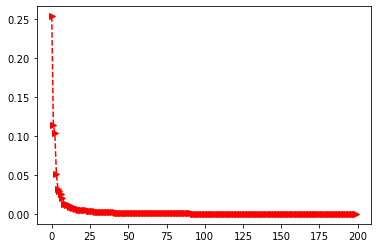

In [160]:
plt.plot(eigenratio[:200],'r>--') # visualizing only 200 componenets

Text(0.5, 0, 'no.of components')

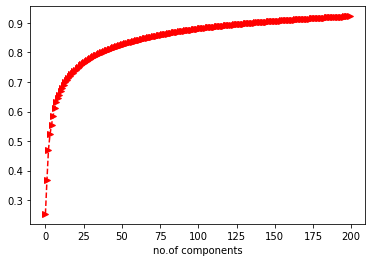

In [161]:
plt.plot(cummulative_sumof_eigenratio[:200],'r>--')
plt.xlabel('no.of components')

In [162]:
pca_50 = PCA(n_components = 50,whiten=True,svd_solver='auto')

In [163]:
x_pca_50 = pca_50.fit_transform(X1)

In [164]:
x_pca_50.shape

(5466, 50)

In [165]:
pk.dump(pca_50,open(r'C:\Users\preetamvarun\Documents\projects\gender_classification\pca_50.pickle','wb'))

In [166]:
x_pca_inv = pca_50.inverse_transform(x_pca_50)

In [167]:
x_pca_inv

array([[ 0.28845904,  0.30585231,  0.31329035, ...,  0.05326623,
         0.05427132,  0.0531568 ],
       [-0.28042816, -0.28317708, -0.28275901, ..., -0.32049561,
        -0.32882112, -0.33774892],
       [-0.15873885, -0.16891868, -0.17939061, ...,  0.16175889,
         0.16226932,  0.15373495],
       ...,
       [ 0.14098294,  0.13107109,  0.12895483, ..., -0.1222048 ,
        -0.11886955, -0.11970511],
       [ 0.33540531,  0.3459026 ,  0.36397871, ...,  0.02823245,
         0.01158969,  0.01615826],
       [-0.00100116,  0.00268015,  0.01075966, ...,  0.02864385,
         0.0345421 ,  0.02207456]])

In [168]:
x_pca_inv.shape

(5466, 10000)

In [169]:
eigen_image = x_pca_inv[0,:]
eigen_image.shape

(10000,)

In [170]:
eigen_image = eigen_image.reshape((100,100))

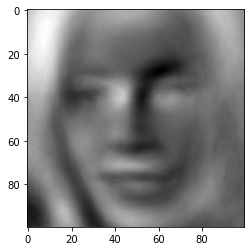

In [171]:
plt.imshow(eigen_image,cmap='gray')

In [172]:
savez_compressed('x_pca_50.npz',x_pca_50)
savez_compressed('Y.npz',Y)

In [173]:
np.savez(r'C:\Users\preetamvarun\Documents\projects\gender_classification\mean.npz',X.mean(axis=0))

In [175]:
xpcanpz = load(r'C:\Users\preetamvarun\Documents\projects\gender_classification\x_pca_50.npz')
Yd =  load(r'C:\Users\preetamvarun\Documents\projects\gender_classification\Y.npz')

In [176]:
x_pca_50 = xpcanpz['arr_0']
Y = Yd['arr_0']

In [177]:
x_pca_50

array([[ 0.88083656,  0.29727945,  0.34343299, ...,  0.39109007,
        -0.43603133,  0.49342149],
       [ 1.19235506, -0.21497793,  0.32264265, ..., -1.15247333,
         0.52803251, -0.79467042],
       [ 0.28675384, -0.54209703, -0.76044463, ...,  0.56341546,
         0.13102021,  0.75803447],
       ...,
       [-0.02428536,  0.78099708,  0.48238707, ...,  0.42718043,
        -0.76730258, -0.24264109],
       [ 1.38623026, -0.07265315, -0.46102149, ...,  1.19002577,
        -0.5584555 , -0.18170842],
       [-0.76818701,  1.11714535, -0.33231178, ...,  0.84636851,
        -0.50962658,  0.40564301]])

In [178]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x_pca_50,Y,test_size = 0.2)

In [179]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4372, 50), (1094, 50), (4372,), (1094,))

In [180]:
from sklearn.svm import SVC

In [181]:
model = SVC()

In [182]:
model.fit(x_train,y_train)
print("model trained successfully")

model trained successfully


In [183]:
model.score(x_train,y_train)

0.9181152790484904

In [184]:
model.score(x_test,y_test)

0.8117001828153565

# Model Evaluation

In [185]:
# confusion matrix 
y_pred = model.predict(x_test)

In [186]:
cm = metrics.confusion_matrix(y_test,y_pred)

In [187]:
cm

array([[324, 129],
       [ 77, 564]], dtype=int64)

In [188]:
metrics.cohen_kappa_score(y_test,y_pred)

0.6052962502408183

# Tuning machine learning model

In [189]:
from sklearn.model_selection import GridSearchCV

In [190]:
model_tune = SVC()

In [21]:
parameters = {
    'C' : [1,10,20,30,40,50,100],
    'kernel' : ['rbf','poly','sigmoid'],
    'gamma' : [0.1,0.05,0.01,0.001,0.002,0.005],
    'coef0' : [0,1]
}

In [22]:
model_grid = GridSearchCV(model_tune,param_grid = parameters, scoring = 'accuracy',cv = 5, verbose = 1)

In [23]:
model_grid.fit(x_train,y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1260 out of 1260 | elapsed: 18.0min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 40, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [24]:
model_grid.best_score_

0.8078653154625695

In [25]:
model_grid.best_params_

{'C': 10, 'coef0': 0, 'gamma': 0.01, 'kernel': 'rbf'}

In [191]:
model = SVC(C = 10, coef0 = 0.0, gamma = 0.01, kernel = 'rbf',probability=True)

In [192]:
model.fit(x_train,y_train)

SVC(C=10, gamma=0.01, probability=True)

In [193]:
model.score(x_train,y_train)

0.9624885635864593

In [194]:
model.score(x_test,y_test)

0.8244972577696527

In [195]:
y_pred = model.predict(x_test)

In [198]:
metrics.cohen_kappa_score(y_test,y_pred)

0.6321207769234811

In [200]:
pk.dump(model,open(r'C:\Users\preetamvarun\Documents\projects\gender_classification\model_svm.pickle','wb'))

In [201]:
savez_compressed('x_train.npz',x_train)
savez_compressed('x_test.npz',x_test)
savez_compressed('y_train.npz',y_train)
savez_compressed('y_test.npz',y_test)

# Pipelining machine learning model

In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
from glob import glob
from numpy import savez_compressed,load
import pickle as pk
from sklearn.decomposition import PCA
from sklearn import metrics
from PIL import Image

In [2]:
gender_pre = ['Male','Female']
font = cv2.FONT_HERSHEY_SIMPLEX

In [3]:
model_pca  = pk.load(open(r'C:\Users\preetamvarun\Documents\projects\gender_classification\pca_50.pickle','rb'))
model_svm = pk.load(open(r'C:\Users\preetamvarun\Documents\projects\gender_classification\model_svm.pickle','rb'))
mean = np.load(r'C:\Users\preetamvarun\Documents\projects\gender_classification\mean.npz')
mean = mean['arr_0']
haar = cv2.CascadeClassifier('C:/Users/preetamvarun/Documents/projects/gender_classification/Module-2/Module-2/data/haarcascade_frontalface_default.xml')

In [14]:
def pipeline_model(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = haar.detectMultiScale(gray,1.5,3)
    for x,y,w,h in faces: 
        roi = gray[y:y+h,x:x+w]
        roi = roi / 255.0
        if roi.shape[1] > 100:
            roi_resize = cv2.resize(roi,(100,100),cv2.INTER_AREA)
        else:
            roi_resize = cv2.resize(roi,(100,100),cv2.INTER_CUBIC)
        roi_reshape = roi_resize.reshape(1,10000) # 1,-1
        roi_mean = roi_reshape - mean
        eigen_image = model_pca.transform(roi_mean)
        results = model_svm.predict_proba(eigen_image)[0]
        predict = results.argmax() # 0 or 1
        score = results[predict]
        text = "%s : %0.2f"%(gender_pre[predict],score)
        cv2.putText(img,text,(x,y),font,2,(0,255,0),2)
    return img


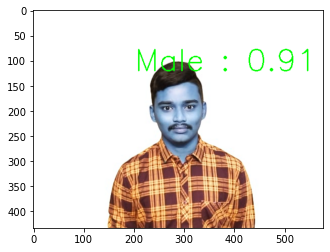

In [15]:
img = cv2.imread(r"C:\Users\preetamvarun\Pictures\selected photos\bluepic.jpeg")
pipeline_model(img)
plt.imshow(img)

In [6]:
cap = cv2.VideoCapture(0)


while True:
    ret, frame = cap.read() # bgr
    
    if ret == False:
        break
        
    frame = pipeline_model(frame)
    
    cv2.imshow('Gender Detector',frame)
    if cv2.waitKey(10) == ord('s'): # press s to exit  --#esc key (27), 
        break
        
cv2.destroyAllWindows()
cap.release()